In [1]:
import pandas as pd
import numpy as np
import calendar
from time import time
from datetime import datetime
import re 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import log_loss, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv("train.csv").replace("MENS WEAR","MENSWEAR")
data_train_orig = pd.read_csv("train.csv").replace("MENS WEAR","MENSWEAR")

In [3]:
data_train.Upc.value_counts()

4.011000e+03    7657
6.053886e+10    2501
7.874235e+09    2067
7.874235e+09    1883
4.046000e+03    1652
6.811311e+10    1515
6.053887e+10    1487
3.338320e+09    1405
4.087000e+03    1370
6.053887e+10    1343
4.900000e+09    1018
4.062000e+03     973
4.065000e+03     953
4.900003e+09     896
3.338365e+09     856
7.874235e+09     828
4.900005e+09     815
6.811316e+10     778
6.053890e+10     778
4.078000e+03     750
6.992216e+10     745
7.874211e+09     719
4.093000e+03     698
4.900001e+09     697
2.096650e+10     686
6.053882e+10     644
7.874235e+09     622
4.051000e+03     620
7.225004e+09     618
3.151000e+03     561
                ... 
7.413001e+09       1
8.806156e+11       1
7.278511e+09       1
7.144151e+10       1
6.811311e+10       1
7.169143e+09       1
7.583857e+10       1
7.943761e+10       1
7.871544e+09       1
2.700042e+09       1
7.659406e+10       1
7.163396e+07       1
7.595452e+10       1
7.617070e+10       1
8.434540e+10       1
7.575587e+10       1
4.402124e+09 

In [4]:
upc_rank = data_train.Upc.value_counts()
upc_rank[upc_rank>499]

4.011000e+03    7657
6.053886e+10    2501
7.874235e+09    2067
7.874235e+09    1883
4.046000e+03    1652
6.811311e+10    1515
6.053887e+10    1487
3.338320e+09    1405
4.087000e+03    1370
6.053887e+10    1343
4.900000e+09    1018
4.062000e+03     973
4.065000e+03     953
4.900003e+09     896
3.338365e+09     856
7.874235e+09     828
4.900005e+09     815
6.811316e+10     778
6.053890e+10     778
4.078000e+03     750
6.992216e+10     745
7.874211e+09     719
4.093000e+03     698
4.900001e+09     697
2.096650e+10     686
6.053882e+10     644
7.874235e+09     622
4.051000e+03     620
7.225004e+09     618
3.151000e+03     561
6.053886e+10     560
7.874235e+09     528
4.022000e+03     526
6.827474e+09     525
2.010880e+10     515
6.053881e+10     510
4.900001e+09     502
7.803538e+10     500
Name: Upc, dtype: int64

In [118]:
len(upc_rank[upc_rank>300])

100

In [5]:
data_train.FinelineNumber.value_counts()

5501.0    8244
1508.0    5121
135.0     4538
808.0     4401
0.0       3837
9546.0    2997
1407.0    2848
4606.0    2753
115.0     2723
203.0     2639
100.0     2634
3004.0    2607
4010.0    2531
3601.0    2465
3600.0    2455
110.0     2237
3120.0    2074
3555.0    2056
8101.0    2037
5017.0    1980
801.0     1946
7010.0    1935
5620.0    1896
202.0     1895
9100.0    1885
4624.0    1834
3467.0    1751
7955.0    1749
9101.0    1721
3702.0    1655
          ... 
6213.0       1
2289.0       1
5380.0       1
8539.0       1
7231.0       1
4314.0       1
5578.0       1
8554.0       1
1152.0       1
7773.0       1
8565.0       1
6177.0       1
1765.0       1
5564.0       1
238.0        1
5217.0       1
5218.0       1
3496.0       1
1791.0       1
3492.0       1
7159.0       1
5518.0       1
2861.0       1
6227.0       1
4495.0       1
2311.0       1
524.0        1
7130.0       1
2847.0       1
7313.0       1
Name: FinelineNumber, Length: 5195, dtype: int64

In [115]:
fln_rank = data_train.FinelineNumber.value_counts()
fln_rank[fln_rank>1000]

5501.0    8244
1508.0    5121
135.0     4538
808.0     4401
0.0       3837
9546.0    2997
1407.0    2848
4606.0    2753
115.0     2723
203.0     2639
100.0     2634
3004.0    2607
4010.0    2531
3601.0    2465
3600.0    2455
110.0     2237
3120.0    2074
3555.0    2056
8101.0    2037
5017.0    1980
801.0     1946
7010.0    1935
5620.0    1896
202.0     1895
9100.0    1885
4624.0    1834
3467.0    1751
7955.0    1749
9101.0    1721
3702.0    1655
          ... 
4451.0    1263
4611.0    1256
1853.0    1233
3729.0    1218
8001.0    1206
3502.0    1200
3717.0    1194
707.0     1189
1511.0    1170
4020.0    1169
2500.0    1161
3556.0    1158
601.0     1121
7978.0    1120
3353.0    1119
2112.0    1106
3658.0    1103
1752.0    1092
7962.0    1080
2401.0    1076
55.0      1071
8014.0    1067
5510.0    1062
5010.0    1053
130.0     1043
3559.0    1026
403.0     1025
3707.0    1016
4005.0    1004
8945.0    1001
Name: FinelineNumber, Length: 93, dtype: int64

In [6]:
data_train.loc[(data_train.FinelineNumber==0) & (data_train.DepartmentDescription != 'FINANCIAL SERVICES') & (data_train.DepartmentDescription != 'OTHER DEPARTMENTS'), :]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
90021,24,25527,Monday,7.524320e+09,1,FROZEN FOODS,0.0
117666,27,34865,Wednesday,7.286493e+10,1,LAWN AND GARDEN,0.0
117728,39,34896,Wednesday,8.404012e+10,2,HOUSEHOLD CHEMICALS/SUPP,0.0
117731,39,34896,Wednesday,8.404012e+10,1,HOUSEHOLD CHEMICALS/SUPP,0.0
222982,5,65872,Monday,2.010010e+10,1,HORTICULTURE AND ACCESS,0.0
225973,39,66750,Monday,2.010010e+10,1,HORTICULTURE AND ACCESS,0.0
256228,9,76013,Wednesday,2.010010e+10,1,HORTICULTURE AND ACCESS,0.0
271767,38,80884,Wednesday,7.524320e+09,1,FROZEN FOODS,0.0
271910,40,80913,Wednesday,7.524320e+09,2,FROZEN FOODS,0.0
316928,40,95215,Saturday,7.524320e+09,1,FROZEN FOODS,0.0


In [7]:
dept_list = sorted(list(data_train.DepartmentDescription.dropna().unique()))

In [8]:
weekdays = list(calendar.day_name)
dept_list_sum = dict.fromkeys(dept_list, np.sum)
weekday_dict = dict.fromkeys(weekdays, np.max)
feature_dict = {"TripType": np.max, 'NumItems': np.sum, 'Return': np.max}
feature_dict = {**feature_dict, **weekday_dict, **dept_list_sum}

In [9]:
def transform_data(data):
    dummies = pd.get_dummies(data.Weekday)
    data[dummies.columns] = dummies
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    dummies = dummies.apply(lambda x: x*data["ScanCount"])
    data[dummies.columns] = dummies 

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    
    data = data.rename(columns={"ScanCount":"NumItems"})
    
    grouped = data.groupby("VisitNumber")
    grouped = grouped.aggregate(feature_dict)
    data = grouped[["TripType", "NumItems", "Return"] + weekdays + dept_list]

    return data

In [10]:
data_new = transform_data(data_train)

In [11]:
def add_category_counts(data):
    alist = []
    for array in np.asarray(data.loc[:, dept_list[0]:]):
        count = 0
        count = sum(x > 0 for x in array)
        alist.append(count)
    cat_counts = pd.DataFrame(alist)
    cat_counts = cat_counts.rename(columns={0:"CategoryCount"})
    cat_counts = cat_counts.set_index(data.index)
    data.insert(3, 'CategoryCounts', cat_counts)
    return data

In [12]:
data_new_cat = add_category_counts(data_new)

In [13]:
X = data_new_cat.drop('TripType', axis=1)

trip_types = sorted(data_new_cat.TripType.unique())
trip_types_map = dict(zip(trip_types, np.arange(0, len(trip_types))))
y = data_new_cat.TripType.map(trip_types_map)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
def fineline_dummies(data):
    fln_ranks = data.FinelineNumber.value_counts()
    fln_ranks = fln_ranks[fln_ranks > 500]
    flns_selected = list(fln_ranks.index)
    dummies = pd.get_dummies(data.FinelineNumber)
    dummies = dummies[flns_selected]
    visit_num = data.VisitNumber
    dummy_data = pd.concat([dummies, visit_num], axis=1)
    dummy_data = dummy_data.groupby("VisitNumber")
    dummy_data = dummy_data.aggregate(np.sum)
    return dummy_data

In [15]:
fln_ranks = data_train.FinelineNumber.value_counts()
fln_ranks = fln_ranks[fln_ranks>1000]

In [16]:
fln_ranks

5501.0    8244
1508.0    5121
135.0     4538
808.0     4401
0.0       3837
9546.0    2997
1407.0    2848
4606.0    2753
115.0     2723
203.0     2639
100.0     2634
3004.0    2607
4010.0    2531
3601.0    2465
3600.0    2455
110.0     2237
3120.0    2074
3555.0    2056
8101.0    2037
5017.0    1980
801.0     1946
7010.0    1935
5620.0    1896
202.0     1895
9100.0    1885
4624.0    1834
3467.0    1751
7955.0    1749
9101.0    1721
3702.0    1655
          ... 
4451.0    1263
4611.0    1256
1853.0    1233
3729.0    1218
8001.0    1206
3502.0    1200
3717.0    1194
707.0     1189
1511.0    1170
4020.0    1169
2500.0    1161
3556.0    1158
601.0     1121
7978.0    1120
3353.0    1119
2112.0    1106
3658.0    1103
1752.0    1092
7962.0    1080
2401.0    1076
55.0      1071
8014.0    1067
5510.0    1062
5010.0    1053
130.0     1043
3559.0    1026
403.0     1025
3707.0    1016
4005.0    1004
8945.0    1001
Name: FinelineNumber, Length: 93, dtype: int64

In [17]:
flns_selected = list(fln_ranks.index)
dummies = pd.get_dummies(data_train.FinelineNumber)
dummies = dummies[flns_selected]
dummies

,5501.0,1508.0,135.0,808.0,0.0,9546.0,1407.0,4606.0,115.0,203.0,...,55.0,8014.0,5510.0,5010.0,130.0,3559.0,403.0,3707.0,4005.0,8945.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dummies_orig = dummies

In [19]:
dummies.columns = ['fln_'+str(col) for col in dummies.columns]

dummy_data = pd.concat([data_train.VisitNumber, dummies], axis=1)

dummy_data.head()

,VisitNumber,fln_5501.0,fln_1508.0,fln_135.0,fln_808.0,fln_0.0,fln_9546.0,fln_1407.0,fln_4606.0,fln_115.0,...,fln_55.0,fln_8014.0,fln_5510.0,fln_5010.0,fln_130.0,fln_3559.0,fln_403.0,fln_3707.0,fln_4005.0,fln_8945.0
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dummy_data = dummy_data.groupby("VisitNumber")
dummy_data = dummy_data.aggregate(np.sum)
dummy_data.head()

,fln_5501.0,fln_1508.0,fln_135.0,fln_808.0,fln_0.0,fln_9546.0,fln_1407.0,fln_4606.0,fln_115.0,fln_203.0,...,fln_55.0,fln_8014.0,fln_5510.0,fln_5010.0,fln_130.0,fln_3559.0,fln_403.0,fln_3707.0,fln_4005.0,fln_8945.0
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data_add_fln = data_new_cat.join(dummy_data)

In [23]:
data_add_fln.columns

Index(['TripType', 'NumItems', 'Return', 'CategoryCounts', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday',
       ...
       'fln_55.0', 'fln_8014.0', 'fln_5510.0', 'fln_5010.0', 'fln_130.0',
       'fln_3559.0', 'fln_403.0', 'fln_3707.0', 'fln_4005.0', 'fln_8945.0'],
      dtype='object', length=171)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [28]:
X = data_add_fln.drop('TripType', axis=1)

trip_types = sorted(data_add_fln.TripType.unique())
trip_types_map = dict(zip(trip_types, np.arange(0, len(trip_types))))
y = data_add_fln.TripType.map(trip_types_map)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
def create_model_3hl(nodes_l1=256, nodes_l2=128, nodes_l3=64, dropout_l1=0.2, dropout_l2=0.2, dropout_l3=0.2):
    model = Sequential()
    model.add(Dense(output_dim=nodes_l1, activation="relu", input_dim=len(X.columns)))
    model.add(Dropout(dropout_l1))
    model.add(Dense(output_dim=nodes_l2, activation="relu"))
    model.add(Dropout(dropout_l2))
    model.add(Dense(output_dim=nodes_l2, activation="relu"))
    model.add(Dropout(dropout_l3))
            
    model.add(Dense(output_dim=len(trip_types), activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    
    return model

In [37]:
len(X.columns)

170

In [38]:
X.head()

,NumItems,Return,CategoryCounts,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,fln_55.0,fln_8014.0,fln_5510.0,fln_5010.0,fln_130.0,fln_3559.0,fln_403.0,fln_3707.0,fln_4005.0,fln_8945.0
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,-1,1.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0.0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,28,1.0,6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0.0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3,0.0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
model_3hl = KerasClassifier(build_fn=create_model_3hl, epochs=70, batch_size=1000, verbose=2)

In [41]:
start = datetime.now()
scores = cross_val_score(model_3hl, X, y, cv=StratifiedKFold(n_splits=4))
end = datetime.now()
str(end-start)

C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=170, units=256)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  import sys
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=38)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/70
 - 4s - loss: 2.1989 - acc: 0.4193
Epoch 2/70
 - 3s - loss: 1.3830 - acc: 0.6119
Epoch 3/70
 - 3s - loss: 1.1975 - acc: 0.6484
Epoch 4/70
 - 3s - loss: 1.1245 - acc: 0.6591
Epoch 5/70
 - 3s - loss: 1.0688 - acc: 0.6721
Epoch 6/70
 - 3s - loss: 1.0416 - acc: 0.6775
Epoch 7/70
 - 3s - loss: 1.0086 - acc: 0.6836
Epoch 8/70
 - 3s - loss: 0.9867 - acc: 0.6870
Epoch 9/70
 - 3s - loss: 0.9645 - acc: 0.6921
Epoch 10/70
 - 3s - loss: 0.9522 - acc: 0.6948
Epoch 11/70
 - 3s - loss: 0.9372 - acc: 0.6960
Epoch 12/70
 - 3s - loss: 0.9237 - acc: 0.7001
Epoch 13/70
 - 3s - loss: 0.9117 - acc: 0.7035
Epoch 14/70
 - 3s - loss: 0.9030 - acc: 0.7041
Epoch 15/70
 - 3s - loss: 0.8914 - acc: 0.7071
Epoch 16/70
 - 3s - loss: 0.8820 - acc: 0.7113
Epoch 17/70
 - 3s - loss: 0.8727 - acc: 0.7119
Epoch 18/70
 - 3s - loss: 0.8613 - acc: 0.7139
Epoch 19/70
 - 3s - loss: 0.8564 - acc: 0.7151
Epoch 20/70
 - 3s - loss: 0.8494 - acc: 0.7160
Epoch 21/70
 - 3s - loss: 0.8427 - acc: 0.7175
Epoch 22/70
 - 3s - lo

Epoch 36/70
 - 5s - loss: 0.7502 - acc: 0.7418
Epoch 37/70
 - 4s - loss: 0.7492 - acc: 0.7403
Epoch 38/70
 - 4s - loss: 0.7429 - acc: 0.7436
Epoch 39/70
 - 5s - loss: 0.7397 - acc: 0.7458
Epoch 40/70
 - 5s - loss: 0.7374 - acc: 0.7445
Epoch 41/70
 - 4s - loss: 0.7357 - acc: 0.7463
Epoch 42/70
 - 4s - loss: 0.7326 - acc: 0.7463
Epoch 43/70
 - 5s - loss: 0.7274 - acc: 0.7473
Epoch 44/70
 - 4s - loss: 0.7272 - acc: 0.7473
Epoch 45/70
 - 3s - loss: 0.7200 - acc: 0.7500
Epoch 46/70
 - 3s - loss: 0.7162 - acc: 0.7510
Epoch 47/70
 - 3s - loss: 0.7139 - acc: 0.7513
Epoch 48/70
 - 3s - loss: 0.7126 - acc: 0.7510
Epoch 49/70
 - 3s - loss: 0.7127 - acc: 0.7519
Epoch 50/70
 - 3s - loss: 0.7057 - acc: 0.7537
Epoch 51/70
 - 4s - loss: 0.7082 - acc: 0.7529
Epoch 52/70
 - 4s - loss: 0.7028 - acc: 0.7533
Epoch 53/70
 - 3s - loss: 0.7021 - acc: 0.7544
Epoch 54/70
 - 4s - loss: 0.6991 - acc: 0.7558
Epoch 55/70
 - 4s - loss: 0.6952 - acc: 0.7573
Epoch 56/70
 - 4s - loss: 0.6960 - acc: 0.7557
Epoch 57/70
 

'0:16:48.449468'

In [45]:
model_3hl = KerasClassifier(build_fn=create_model_3hl, epochs=100, batch_size=2000, verbose=2)

In [46]:
start = datetime.now()
scores = cross_val_score(model_3hl, X, y, cv=StratifiedKFold(n_splits=4))
end = datetime.now()
str(end-start)

C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=170, units=256)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  import sys
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=38)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
 - 4s - loss: 2.6013 - acc: 0.3273
Epoch 2/100
 - 3s - loss: 1.6408 - acc: 0.5603
Epoch 3/100
 - 3s - loss: 1.3718 - acc: 0.6169
Epoch 4/100
 - 3s - loss: 1.2507 - acc: 0.6369
Epoch 5/100
 - 3s - loss: 1.1719 - acc: 0.6534
Epoch 6/100
 - 3s - loss: 1.1308 - acc: 0.6598
Epoch 7/100
 - 3s - loss: 1.0954 - acc: 0.6662
Epoch 8/100
 - 3s - loss: 1.0691 - acc: 0.6711
Epoch 9/100
 - 3s - loss: 1.0417 - acc: 0.6772
Epoch 10/100
 - 3s - loss: 1.0273 - acc: 0.6791
Epoch 11/100
 - 3s - loss: 1.0044 - acc: 0.6837
Epoch 12/100
 - 3s - loss: 0.9929 - acc: 0.6852
Epoch 13/100
 - 3s - loss: 0.9786 - acc: 0.6889
Epoch 14/100
 - 3s - loss: 0.9627 - acc: 0.6917
Epoch 15/100
 - 3s - loss: 0.9556 - acc: 0.6927
Epoch 16/100
 - 3s - loss: 0.9417 - acc: 0.6963
Epoch 17/100
 - 3s - loss: 0.9340 - acc: 0.6988
Epoch 18/100
 - 3s - loss: 0.9241 - acc: 0.7000
Epoch 19/100
 - 3s - loss: 0.9163 - acc: 0.7004
Epoch 20/100
 - 3s - loss: 0.9063 - acc: 0.7036
Epoch 21/100
 - 3s - loss: 0.8992 - acc: 0.7042
E

 - 3s - loss: 0.7161 - acc: 0.7503
Epoch 73/100
 - 3s - loss: 0.7151 - acc: 0.7510
Epoch 74/100
 - 3s - loss: 0.7167 - acc: 0.7508
Epoch 75/100
 - 3s - loss: 0.7098 - acc: 0.7532
Epoch 76/100
 - 3s - loss: 0.7078 - acc: 0.7536
Epoch 77/100
 - 3s - loss: 0.7112 - acc: 0.7515
Epoch 78/100
 - 3s - loss: 0.7048 - acc: 0.7536
Epoch 79/100
 - 3s - loss: 0.7029 - acc: 0.7548
Epoch 80/100
 - 3s - loss: 0.7046 - acc: 0.7539
Epoch 81/100
 - 3s - loss: 0.6989 - acc: 0.7547
Epoch 82/100
 - 3s - loss: 0.6985 - acc: 0.7559
Epoch 83/100
 - 3s - loss: 0.6979 - acc: 0.7553
Epoch 84/100
 - 3s - loss: 0.6955 - acc: 0.7565
Epoch 85/100
 - 3s - loss: 0.6977 - acc: 0.7557
Epoch 86/100
 - 3s - loss: 0.6929 - acc: 0.7568
Epoch 87/100
 - 3s - loss: 0.6917 - acc: 0.7567
Epoch 88/100
 - 3s - loss: 0.6870 - acc: 0.7599
Epoch 89/100
 - 3s - loss: 0.6870 - acc: 0.7593
Epoch 90/100
 - 3s - loss: 0.6844 - acc: 0.7588
Epoch 91/100
 - 3s - loss: 0.6852 - acc: 0.7594
Epoch 92/100
 - 3s - loss: 0.6858 - acc: 0.7599
Epoch

Epoch 44/100
 - 3s - loss: 0.7852 - acc: 0.7312
Epoch 45/100
 - 3s - loss: 0.7842 - acc: 0.7318
Epoch 46/100
 - 3s - loss: 0.7826 - acc: 0.7322
Epoch 47/100
 - 3s - loss: 0.7777 - acc: 0.7346
Epoch 48/100
 - 3s - loss: 0.7748 - acc: 0.7330
Epoch 49/100
 - 3s - loss: 0.7723 - acc: 0.7346
Epoch 50/100
 - 3s - loss: 0.7696 - acc: 0.7357
Epoch 51/100
 - 3s - loss: 0.7659 - acc: 0.7371
Epoch 52/100
 - 3s - loss: 0.7634 - acc: 0.7378
Epoch 53/100
 - 4s - loss: 0.7633 - acc: 0.7372
Epoch 54/100
 - 4s - loss: 0.7586 - acc: 0.7371
Epoch 55/100
 - 4s - loss: 0.7578 - acc: 0.7385
Epoch 56/100
 - 4s - loss: 0.7557 - acc: 0.7389
Epoch 57/100
 - 4s - loss: 0.7492 - acc: 0.7396
Epoch 58/100
 - 4s - loss: 0.7510 - acc: 0.7392
Epoch 59/100
 - 4s - loss: 0.7493 - acc: 0.7394
Epoch 60/100
 - 4s - loss: 0.7458 - acc: 0.7423
Epoch 61/100
 - 4s - loss: 0.7402 - acc: 0.7432
Epoch 62/100
 - 4s - loss: 0.7389 - acc: 0.7418
Epoch 63/100
 - 4s - loss: 0.7388 - acc: 0.7428
Epoch 64/100
 - 4s - loss: 0.7371 - acc:

'0:24:55.277226'

In [49]:
scores

array([0.71482891, 0.71368254, 0.7051518 , 0.72249645])

In [50]:
model_3hl = KerasClassifier(build_fn=create_model_3hl, epochs=100, batch_size=500, verbose=2)

In [51]:
start = datetime.now()
scores = cross_val_score(model_3hl, X, y, cv=StratifiedKFold(n_splits=4))
end = datetime.now()
str(end-start)

C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=170, units=256)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  import sys
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=38)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
 - 4s - loss: 1.8903 - acc: 0.4911
Epoch 2/100
 - 3s - loss: 1.2230 - acc: 0.6433
Epoch 3/100
 - 3s - loss: 1.1124 - acc: 0.6632
Epoch 4/100
 - 3s - loss: 1.0467 - acc: 0.6753
Epoch 5/100
 - 3s - loss: 1.0068 - acc: 0.6836
Epoch 6/100
 - 3s - loss: 0.9805 - acc: 0.6893
Epoch 7/100
 - 3s - loss: 0.9562 - acc: 0.6942
Epoch 8/100
 - 3s - loss: 0.9346 - acc: 0.6980
Epoch 9/100
 - 3s - loss: 0.9174 - acc: 0.7027
Epoch 10/100
 - 3s - loss: 0.8995 - acc: 0.7065
Epoch 11/100
 - 3s - loss: 0.8862 - acc: 0.7097
Epoch 12/100
 - 3s - loss: 0.8733 - acc: 0.7116
Epoch 13/100
 - 3s - loss: 0.8636 - acc: 0.7145
Epoch 14/100
 - 3s - loss: 0.8535 - acc: 0.7166
Epoch 15/100
 - 3s - loss: 0.8448 - acc: 0.7189
Epoch 16/100
 - 3s - loss: 0.8371 - acc: 0.7215
Epoch 17/100
 - 3s - loss: 0.8285 - acc: 0.7217
Epoch 18/100
 - 3s - loss: 0.8182 - acc: 0.7254
Epoch 19/100
 - 3s - loss: 0.8159 - acc: 0.7245
Epoch 20/100
 - 3s - loss: 0.8100 - acc: 0.7263
Epoch 21/100
 - 3s - loss: 0.7997 - acc: 0.7298
E

 - 4s - loss: 0.6625 - acc: 0.7689
Epoch 73/100
 - 5s - loss: 0.6677 - acc: 0.7675
Epoch 74/100
 - 5s - loss: 0.6611 - acc: 0.7684
Epoch 75/100
 - 5s - loss: 0.6590 - acc: 0.7681
Epoch 76/100
 - 5s - loss: 0.6564 - acc: 0.7693
Epoch 77/100
 - 5s - loss: 0.6573 - acc: 0.7704
Epoch 78/100
 - 5s - loss: 0.6582 - acc: 0.7702
Epoch 79/100
 - 5s - loss: 0.6560 - acc: 0.7693
Epoch 80/100
 - 5s - loss: 0.6544 - acc: 0.7710
Epoch 81/100
 - 5s - loss: 0.6563 - acc: 0.7697
Epoch 82/100
 - 4s - loss: 0.6542 - acc: 0.7698
Epoch 83/100
 - 4s - loss: 0.6489 - acc: 0.7727
Epoch 84/100
 - 5s - loss: 0.6513 - acc: 0.7711
Epoch 85/100
 - 5s - loss: 0.6504 - acc: 0.7722
Epoch 86/100
 - 4s - loss: 0.6505 - acc: 0.7721
Epoch 87/100
 - 5s - loss: 0.6523 - acc: 0.7725
Epoch 88/100
 - 5s - loss: 0.6508 - acc: 0.7735
Epoch 89/100
 - 4s - loss: 0.6465 - acc: 0.7749
Epoch 90/100
 - 5s - loss: 0.6450 - acc: 0.7737
Epoch 91/100
 - 6s - loss: 0.6443 - acc: 0.7749
Epoch 92/100
 - 5s - loss: 0.6454 - acc: 0.7744
Epoch

Epoch 44/100
 - 5s - loss: 0.7107 - acc: 0.7523
Epoch 45/100
 - 5s - loss: 0.7103 - acc: 0.7523
Epoch 46/100
 - 5s - loss: 0.7085 - acc: 0.7533
Epoch 47/100
 - 5s - loss: 0.7075 - acc: 0.7511
Epoch 48/100
 - 5s - loss: 0.7063 - acc: 0.7537
Epoch 49/100
 - 6s - loss: 0.6992 - acc: 0.7547
Epoch 50/100
 - 5s - loss: 0.7020 - acc: 0.7534
Epoch 51/100
 - 5s - loss: 0.6991 - acc: 0.7554
Epoch 52/100
 - 6s - loss: 0.6943 - acc: 0.7561
Epoch 53/100
 - 5s - loss: 0.6952 - acc: 0.7570
Epoch 54/100
 - 5s - loss: 0.6933 - acc: 0.7567
Epoch 55/100
 - 6s - loss: 0.6890 - acc: 0.7600
Epoch 56/100
 - 5s - loss: 0.6902 - acc: 0.7571
Epoch 57/100
 - 5s - loss: 0.6876 - acc: 0.7585
Epoch 58/100
 - 6s - loss: 0.6853 - acc: 0.7583
Epoch 59/100
 - 5s - loss: 0.6856 - acc: 0.7589
Epoch 60/100
 - 5s - loss: 0.6845 - acc: 0.7601
Epoch 61/100
 - 6s - loss: 0.6804 - acc: 0.7609
Epoch 62/100
 - 5s - loss: 0.6773 - acc: 0.7633
Epoch 63/100
 - 6s - loss: 0.6758 - acc: 0.7631
Epoch 64/100
 - 5s - loss: 0.6742 - acc:

'0:29:42.033879'

In [53]:
scores, scores.mean()

(array([0.7095642 , 0.708457  , 0.69632851, 0.71693299]), 0.7078206749159727)

In [54]:
model_3hl = KerasClassifier(build_fn=create_model_3hl, epochs=100, batch_size=1000, verbose=2)

In [55]:
start = datetime.now()
scores = cross_val_score(model_3hl, X, y, cv=StratifiedKFold(n_splits=4))
end = datetime.now()
str(end-start)

C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=170, units=256)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  import sys
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=38)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
 - 5s - loss: 2.1914 - acc: 0.4271
Epoch 2/100
 - 3s - loss: 1.3858 - acc: 0.6127
Epoch 3/100
 - 3s - loss: 1.2099 - acc: 0.6453
Epoch 4/100
 - 4s - loss: 1.1145 - acc: 0.6645
Epoch 5/100
 - 3s - loss: 1.0738 - acc: 0.6718
Epoch 6/100
 - 3s - loss: 1.0373 - acc: 0.6772
Epoch 7/100
 - 3s - loss: 1.0078 - acc: 0.6829
Epoch 8/100
 - 3s - loss: 0.9859 - acc: 0.6879
Epoch 9/100
 - 3s - loss: 0.9673 - acc: 0.6920
Epoch 10/100
 - 3s - loss: 0.9506 - acc: 0.6965
Epoch 11/100
 - 3s - loss: 0.9388 - acc: 0.6983
Epoch 12/100
 - 3s - loss: 0.9247 - acc: 0.7021
Epoch 13/100
 - 3s - loss: 0.9141 - acc: 0.7018
Epoch 14/100
 - 3s - loss: 0.9013 - acc: 0.7062
Epoch 15/100
 - 3s - loss: 0.8906 - acc: 0.7089
Epoch 16/100
 - 3s - loss: 0.8808 - acc: 0.7117
Epoch 17/100
 - 3s - loss: 0.8699 - acc: 0.7126
Epoch 18/100
 - 3s - loss: 0.8613 - acc: 0.7153
Epoch 19/100
 - 3s - loss: 0.8557 - acc: 0.7152
Epoch 20/100
 - 3s - loss: 0.8474 - acc: 0.7197
Epoch 21/100
 - 3s - loss: 0.8381 - acc: 0.7203
E

 - 3s - loss: 0.6800 - acc: 0.7611
Epoch 73/100
 - 3s - loss: 0.6759 - acc: 0.7619
Epoch 74/100
 - 3s - loss: 0.6764 - acc: 0.7621
Epoch 75/100
 - 3s - loss: 0.6725 - acc: 0.7629
Epoch 76/100
 - 3s - loss: 0.6719 - acc: 0.7637
Epoch 77/100
 - 3s - loss: 0.6699 - acc: 0.7646
Epoch 78/100
 - 3s - loss: 0.6684 - acc: 0.7634
Epoch 79/100
 - 3s - loss: 0.6692 - acc: 0.7645
Epoch 80/100
 - 3s - loss: 0.6669 - acc: 0.7642
Epoch 81/100
 - 3s - loss: 0.6634 - acc: 0.7654
Epoch 82/100
 - 3s - loss: 0.6625 - acc: 0.7660
Epoch 83/100
 - 3s - loss: 0.6647 - acc: 0.7655
Epoch 84/100
 - 3s - loss: 0.6615 - acc: 0.7675
Epoch 85/100
 - 3s - loss: 0.6597 - acc: 0.7674
Epoch 86/100
 - 3s - loss: 0.6610 - acc: 0.7664
Epoch 87/100
 - 3s - loss: 0.6549 - acc: 0.7681
Epoch 88/100
 - 3s - loss: 0.6532 - acc: 0.7678
Epoch 89/100
 - 3s - loss: 0.6557 - acc: 0.7678
Epoch 90/100
 - 3s - loss: 0.6522 - acc: 0.7692
Epoch 91/100
 - 3s - loss: 0.6522 - acc: 0.7680
Epoch 92/100
 - 3s - loss: 0.6514 - acc: 0.7683
Epoch

Epoch 44/100
 - 3s - loss: 0.7431 - acc: 0.7423
Epoch 45/100
 - 3s - loss: 0.7395 - acc: 0.7438
Epoch 46/100
 - 3s - loss: 0.7359 - acc: 0.7447
Epoch 47/100
 - 4s - loss: 0.7339 - acc: 0.7443
Epoch 48/100
 - 3s - loss: 0.7295 - acc: 0.7471
Epoch 49/100
 - 3s - loss: 0.7255 - acc: 0.7469
Epoch 50/100
 - 3s - loss: 0.7292 - acc: 0.7465
Epoch 51/100
 - 3s - loss: 0.7213 - acc: 0.7478
Epoch 52/100
 - 3s - loss: 0.7243 - acc: 0.7476
Epoch 53/100
 - 3s - loss: 0.7199 - acc: 0.7484
Epoch 54/100
 - 3s - loss: 0.7164 - acc: 0.7507
Epoch 55/100
 - 3s - loss: 0.7179 - acc: 0.7496
Epoch 56/100
 - 3s - loss: 0.7124 - acc: 0.7522
Epoch 57/100
 - 3s - loss: 0.7114 - acc: 0.7502
Epoch 58/100
 - 3s - loss: 0.7087 - acc: 0.7516
Epoch 59/100
 - 3s - loss: 0.7061 - acc: 0.7527
Epoch 60/100
 - 3s - loss: 0.7042 - acc: 0.7527
Epoch 61/100
 - 3s - loss: 0.7059 - acc: 0.7537
Epoch 62/100
 - 3s - loss: 0.7011 - acc: 0.7551
Epoch 63/100
 - 3s - loss: 0.7011 - acc: 0.7539
Epoch 64/100
 - 3s - loss: 0.6968 - acc:

'6:26:07.192997'

In [56]:
scores, scores.mean()

(array([0.71039987, 0.71476945, 0.70465   , 0.71647285]), 0.711573041015999)

In [57]:
model_3hl = KerasClassifier(build_fn=create_model_3hl, epochs=100, batch_size=2000, verbose=1)

In [58]:
start = datetime.now()
scores = cross_val_score(model_3hl, X, y, cv=StratifiedKFold(n_splits=4))
end = datetime.now()
str(end-start)

C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=170, units=256)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  import sys
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=38)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
71741/71741 [==============================] - 7s 94us/step - loss: 2.5602 - acc: 0.3346
Epoch 2/100
71741/71741 [==============================] - 4s 53us/step - loss: 1.6396 - acc: 0.5613
Epoch 3/100
71741/71741 [==============================] - 4s 55us/step - loss: 1.3706 - acc: 0.6148
Epoch 4/100
71741/71741 [==============================] - 4s 51us/step - loss: 1.2387 - acc: 0.6402
Epoch 5/100
71741/71741 [==============================] - 4s 52us/step - loss: 1.1670 - acc: 0.6536
Epoch 6/100
71741/71741 [==============================] - 4s 53us/step - loss: 1.1198 - acc: 0.6620
Epoch 7/100
71741/71741 [==============================] - 4s 57us/step - loss: 1.0863 - acc: 0.6682
Epoch 8/100
71741/71741 [==============================] - 5s 66us/step - loss: 1.0583 - acc: 0.6733
Epoch 9/100
71741/71741 [==============================] - 4s 54us/step - loss: 1.0336 - acc: 0.6761
Epoch 10/100
71741/71741 [==============================] - 4s 61us/step - loss: 1.0155 - a

71741/71741 [==============================] - 4s 52us/step - loss: 0.6999 - acc: 0.7556
Epoch 82/100
71741/71741 [==============================] - 3s 48us/step - loss: 0.7001 - acc: 0.7562
Epoch 83/100
71741/71741 [==============================] - 4s 49us/step - loss: 0.6972 - acc: 0.7553
Epoch 84/100
71741/71741 [==============================] - 4s 53us/step - loss: 0.6957 - acc: 0.7556
Epoch 85/100
71741/71741 [==============================] - 4s 51us/step - loss: 0.6920 - acc: 0.7581
Epoch 86/100
71741/71741 [==============================] - 4s 51us/step - loss: 0.6902 - acc: 0.7580
Epoch 87/100
71741/71741 [==============================] - 3s 49us/step - loss: 0.6908 - acc: 0.7579
Epoch 88/100
71741/71741 [==============================] - 4s 50us/step - loss: 0.6897 - acc: 0.7583
Epoch 89/100
71741/71741 [==============================] - 4s 59us/step - loss: 0.6870 - acc: 0.7585
Epoch 90/100
71741/71741 [==============================] - 3s 49us/step - loss: 0.6859 - acc: 

71753/71753 [==============================] - 4s 49us/step - loss: 0.7440 - acc: 0.7425: 2s -
Epoch 59/100
71753/71753 [==============================] - 3s 48us/step - loss: 0.7450 - acc: 0.7424
Epoch 60/100
71753/71753 [==============================] - 3s 44us/step - loss: 0.7414 - acc: 0.7446
Epoch 61/100
71753/71753 [==============================] - 3s 44us/step - loss: 0.7390 - acc: 0.7447
Epoch 62/100
71753/71753 [==============================] - 3s 44us/step - loss: 0.7363 - acc: 0.7440
Epoch 63/100
71753/71753 [==============================] - 4s 49us/step - loss: 0.7345 - acc: 0.7449
Epoch 64/100
71753/71753 [==============================] - 4s 50us/step - loss: 0.7333 - acc: 0.7457
Epoch 65/100
71753/71753 [==============================] - 3s 45us/step - loss: 0.7292 - acc: 0.7467
Epoch 66/100
71753/71753 [==============================] - 4s 52us/step - loss: 0.7278 - acc: 0.7446
Epoch 67/100
71753/71753 [==============================] - 3s 43us/step - loss: 0.7280 -

Epoch 37/100
71760/71760 [==============================] - 4s 58us/step - loss: 0.7925 - acc: 0.7288
Epoch 38/100
71760/71760 [==============================] - 4s 60us/step - loss: 0.7949 - acc: 0.7299
Epoch 39/100
71760/71760 [==============================] - 4s 58us/step - loss: 0.7931 - acc: 0.7288
Epoch 40/100
71760/71760 [==============================] - 4s 60us/step - loss: 0.7857 - acc: 0.7324
Epoch 41/100
71760/71760 [==============================] - 4s 61us/step - loss: 0.7815 - acc: 0.7332
Epoch 42/100
71760/71760 [==============================] - 4s 60us/step - loss: 0.7764 - acc: 0.7338
Epoch 43/100
71760/71760 [==============================] - 4s 60us/step - loss: 0.7737 - acc: 0.7348
Epoch 44/100
71760/71760 [==============================] - 4s 56us/step - loss: 0.7703 - acc: 0.7359
Epoch 45/100
71760/71760 [==============================] - 5s 64us/step - loss: 0.7656 - acc: 0.7361
Epoch 46/100
71760/71760 [==============================] - 4s 60us/step - loss: 0

71768/71768 [==============================] - 5s 67us/step - loss: 0.9438 - acc: 0.6941
Epoch 17/100
71768/71768 [==============================] - 5s 76us/step - loss: 0.9302 - acc: 0.6957
Epoch 18/100
71768/71768 [==============================] - 5s 64us/step - loss: 0.9202 - acc: 0.6995
Epoch 19/100
71768/71768 [==============================] - 4s 60us/step - loss: 0.9089 - acc: 0.7015
Epoch 20/100
71768/71768 [==============================] - 4s 54us/step - loss: 0.9038 - acc: 0.7013
Epoch 21/100
71768/71768 [==============================] - 4s 55us/step - loss: 0.8975 - acc: 0.7040
Epoch 22/100
71768/71768 [==============================] - 4s 51us/step - loss: 0.8884 - acc: 0.7052
Epoch 23/100
71768/71768 [==============================] - 4s 53us/step - loss: 0.8813 - acc: 0.7076
Epoch 24/100
71768/71768 [==============================] - 4s 53us/step - loss: 0.8775 - acc: 0.7102
Epoch 25/100
71768/71768 [==============================] - 4s 57us/step - loss: 0.8683 - acc: 

71768/71768 [==============================] - 4s 52us/step - loss: 0.6801 - acc: 0.7603
Epoch 97/100
71768/71768 [==============================] - 4s 50us/step - loss: 0.6766 - acc: 0.7610
Epoch 98/100
71768/71768 [==============================] - 4s 51us/step - loss: 0.6761 - acc: 0.7606
Epoch 99/100
71768/71768 [==============================] - 4s 53us/step - loss: 0.6754 - acc: 0.7632
Epoch 100/100
23906/23906 [==============================] - 2s 66us/step


'0:27:15.453601'

In [59]:
scores, scores.mean()

(array([0.71278151, 0.71790477, 0.70778623, 0.72157618]), 0.7150121725380585)

C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=170, units=256)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  import sys
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=38)`
  # Remove the CWD from sys.path while we load stuff.


Train on 71755 samples, validate on 23919 samples
Epoch 1/100
71755/71755 [==============================] - 6s 85us/step - loss: 2.5827 - acc: 0.3215 - val_loss: 1.6925 - val_acc: 0.5483
Epoch 2/100
71755/71755 [==============================] - 4s 52us/step - loss: 1.6771 - acc: 0.5512 - val_loss: 1.2839 - val_acc: 0.6410
Epoch 3/100
71755/71755 [==============================] - 4s 50us/step - loss: 1.3962 - acc: 0.6107 - val_loss: 1.1301 - val_acc: 0.6756
Epoch 4/100
71755/71755 [==============================] - 3s 46us/step - loss: 1.2634 - acc: 0.6327 - val_loss: 1.0740 - val_acc: 0.6735
Epoch 5/100
71755/71755 [==============================] - 3s 48us/step - loss: 1.1860 - acc: 0.6484 - val_loss: 1.0030 - val_acc: 0.6923
Epoch 6/100
71755/71755 [==============================] - 4s 53us/step - loss: 1.1362 - acc: 0.6546 - val_loss: 0.9838 - val_acc: 0.6941
Epoch 7/100
71755/71755 [==============================] - 3s 47us/step - loss: 1.1005 - acc: 0.6627 - val_loss: 0.9483 - 

71755/71755 [==============================] - 4s 56us/step - loss: 0.7470 - acc: 0.7408 - val_loss: 0.8045 - val_acc: 0.7292
Epoch 60/100
71755/71755 [==============================] - 4s 62us/step - loss: 0.7438 - acc: 0.7419 - val_loss: 0.8062 - val_acc: 0.7267
Epoch 61/100
71755/71755 [==============================] - 5s 65us/step - loss: 0.7453 - acc: 0.7422 - val_loss: 0.8051 - val_acc: 0.7256
Epoch 62/100
71755/71755 [==============================] - 4s 56us/step - loss: 0.7439 - acc: 0.7427 - val_loss: 0.8078 - val_acc: 0.7266
Epoch 63/100
71755/71755 [==============================] - 4s 56us/step - loss: 0.7383 - acc: 0.7433 - val_loss: 0.8056 - val_acc: 0.7272
Epoch 64/100
71755/71755 [==============================] - 5s 63us/step - loss: 0.7360 - acc: 0.7444 - val_loss: 0.8091 - val_acc: 0.7278
Epoch 65/100
71755/71755 [==============================] - 5s 63us/step - loss: 0.7333 - acc: 0.7426 - val_loss: 0.8137 - val_acc: 0.7247
Epoch 66/100
71755/71755 [==============

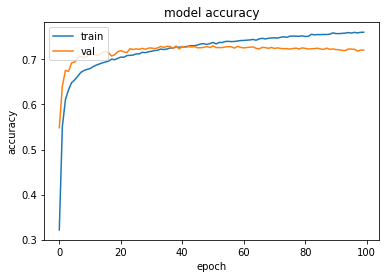

In [61]:
history = model_3hl.fit(X, y,validation_split = 0.25, epochs=100, batch_size=2000)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

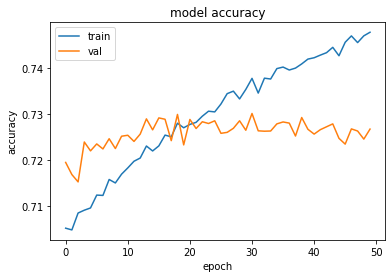

In [76]:
plt.plot(history.history['acc'][20:70])
plt.plot(history.history['val_acc'][20:70])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

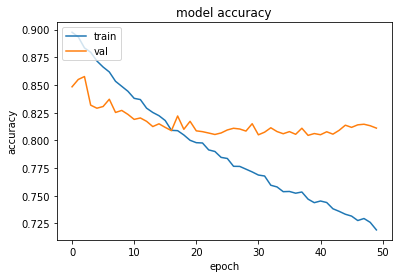

In [78]:
plt.plot(history.history['loss'][20:70])
plt.plot(history.history['val_loss'][20:70])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [79]:
def create_model_1hl(nodes_l1=256, dropout_l1=0.2):
    model = Sequential()
    model.add(Dense(output_dim=nodes_l1, activation="relu", input_dim=len(X.columns)))
    model.add(Dropout(dropout_l1))
            
    model.add(Dense(output_dim=len(trip_types), activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    
    return model

In [82]:
model_1hl = KerasClassifier(build_fn=create_model_1hl, epochs=100, batch_size=1000, verbose=2)

C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=170, units=256)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=38)`
  


Train on 71755 samples, validate on 23919 samples
Epoch 1/100
 - 4s - loss: 2.3780 - acc: 0.4518 - val_loss: 1.6209 - val_acc: 0.6109
Epoch 2/100
 - 2s - loss: 1.4271 - acc: 0.6222 - val_loss: 1.1924 - val_acc: 0.6650
Epoch 3/100
 - 2s - loss: 1.1700 - acc: 0.6583 - val_loss: 1.0597 - val_acc: 0.6790
Epoch 4/100
 - 2s - loss: 1.0682 - acc: 0.6735 - val_loss: 0.9923 - val_acc: 0.6930
Epoch 5/100
 - 2s - loss: 1.0080 - acc: 0.6833 - val_loss: 0.9515 - val_acc: 0.7005
Epoch 6/100
 - 3s - loss: 0.9671 - acc: 0.6910 - val_loss: 0.9259 - val_acc: 0.7038
Epoch 7/100
 - 2s - loss: 0.9345 - acc: 0.6971 - val_loss: 0.9042 - val_acc: 0.7058
Epoch 8/100
 - 2s - loss: 0.9087 - acc: 0.7025 - val_loss: 0.8922 - val_acc: 0.7085
Epoch 9/100
 - 2s - loss: 0.8898 - acc: 0.7058 - val_loss: 0.8744 - val_acc: 0.7122
Epoch 10/100
 - 2s - loss: 0.8731 - acc: 0.7074 - val_loss: 0.8612 - val_acc: 0.7148
Epoch 11/100
 - 2s - loss: 0.8560 - acc: 0.7130 - val_loss: 0.8534 - val_acc: 0.7147
Epoch 12/100
 - 2s - los

Epoch 97/100
 - 2s - loss: 0.6096 - acc: 0.7823 - val_loss: 0.8763 - val_acc: 0.7142
Epoch 98/100
 - 3s - loss: 0.6084 - acc: 0.7813 - val_loss: 0.8788 - val_acc: 0.7150
Epoch 99/100
 - 3s - loss: 0.6098 - acc: 0.7827 - val_loss: 0.8797 - val_acc: 0.7148
Epoch 100/100
 - 2s - loss: 0.6077 - acc: 0.7828 - val_loss: 0.8811 - val_acc: 0.7136


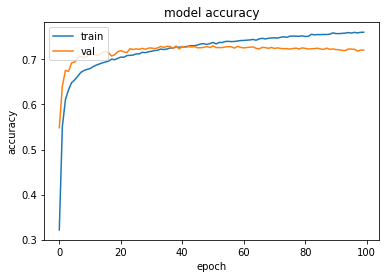

In [83]:
hist_1hl = model_1hl.fit(X, y,validation_split = 0.25, epochs=100)

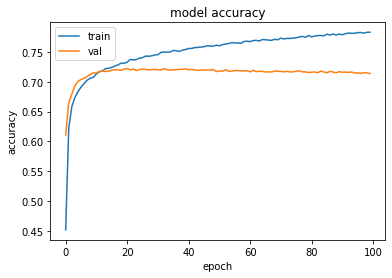

In [84]:
plt.plot(hist_1hl.history['acc'])
plt.plot(hist_1hl.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

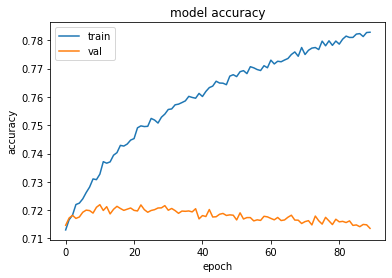

In [94]:
plt.plot(hist_1hl.history['acc'][10:])
plt.plot(hist_1hl.history['val_acc'][10:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

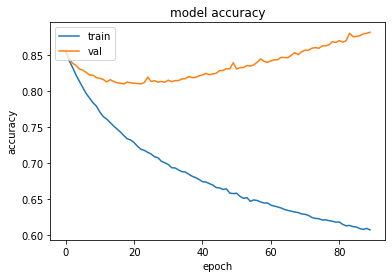

In [93]:
plt.plot(hist_1hl.history['loss'][10:])
plt.plot(hist_1hl.history['val_loss'][10:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [95]:
X = data_new_cat.drop('TripType', axis=1)

trip_types = sorted(data_new_cat.TripType.unique())
trip_types_map = dict(zip(trip_types, np.arange(0, len(trip_types))))
y = data_add_fln.TripType.map(trip_types_map)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [96]:
def create_model_1hl(nodes_l1=128, dropout_l1=0.2):
    model = Sequential()
    model.add(Dense(output_dim=nodes_l1, activation="relu", input_dim=len(X.columns)))
    model.add(Dropout(dropout_l1))
            
    model.add(Dense(output_dim=len(trip_types), activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    
    return model

In [97]:
model_1hl = KerasClassifier(build_fn=create_model_1hl, epochs=100, batch_size=1000, verbose=2)

In [99]:
hist_1hl = model_1hl.fit(X, y,validation_split = 0.25, epochs=100)

C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=77, units=128)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Xiuquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=38)`
  


Train on 71755 samples, validate on 23919 samples
Epoch 1/100
 - 4s - loss: 2.7876 - acc: 0.3431 - val_loss: 2.0215 - val_acc: 0.5661
Epoch 2/100
 - 1s - loss: 1.7929 - acc: 0.5643 - val_loss: 1.4533 - val_acc: 0.6353
Epoch 3/100
 - 1s - loss: 1.4040 - acc: 0.6219 - val_loss: 1.2177 - val_acc: 0.6601
Epoch 4/100
 - 1s - loss: 1.2362 - acc: 0.6449 - val_loss: 1.1053 - val_acc: 0.6769
Epoch 5/100
 - 2s - loss: 1.1520 - acc: 0.6557 - val_loss: 1.0492 - val_acc: 0.6815
Epoch 6/100
 - 1s - loss: 1.1014 - acc: 0.6637 - val_loss: 1.0151 - val_acc: 0.6844
Epoch 7/100
 - 1s - loss: 1.0619 - acc: 0.6693 - val_loss: 0.9888 - val_acc: 0.6864
Epoch 8/100
 - 1s - loss: 1.0385 - acc: 0.6728 - val_loss: 0.9695 - val_acc: 0.6913
Epoch 9/100
 - 1s - loss: 1.0151 - acc: 0.6768 - val_loss: 0.9554 - val_acc: 0.6912
Epoch 10/100
 - 1s - loss: 0.9975 - acc: 0.6809 - val_loss: 0.9425 - val_acc: 0.6950
Epoch 11/100
 - 1s - loss: 0.9842 - acc: 0.6811 - val_loss: 0.9305 - val_acc: 0.6960
Epoch 12/100
 - 1s - los

Epoch 97/100
 - 1s - loss: 0.8080 - acc: 0.7169 - val_loss: 0.8465 - val_acc: 0.7067
Epoch 98/100
 - 1s - loss: 0.8053 - acc: 0.7183 - val_loss: 0.8481 - val_acc: 0.7063
Epoch 99/100
 - 1s - loss: 0.8067 - acc: 0.7179 - val_loss: 0.8465 - val_acc: 0.7081
Epoch 100/100
 - 1s - loss: 0.8050 - acc: 0.7171 - val_loss: 0.8460 - val_acc: 0.7067


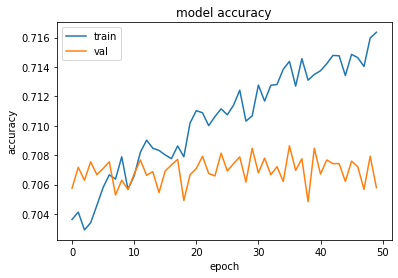

In [109]:
plt.plot(hist_1hl.history['acc'][30:80])
plt.plot(hist_1hl.history['val_acc'][30:80])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

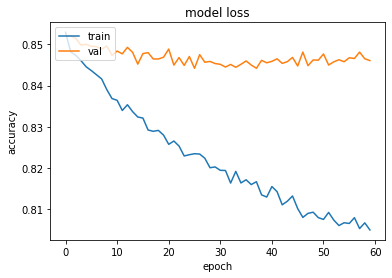

In [105]:
plt.plot(hist_1hl.history['loss'][40:])
plt.plot(hist_1hl.history['val_loss'][40:])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()